Course: http://cs229.stanford.edu/syllabus.html

pdf from <http://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf>
https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/Linear%20Regression%20using%20Gradient%20Descent.ipynb


![](https://github.com/chasinginfinity/ml-from-scratch/raw/24c0c0472d87f31c65cb9ad82ff0836afce924f1/02%20Linear%20Regression%20using%20Gradient%20Descent/animation1.gif)

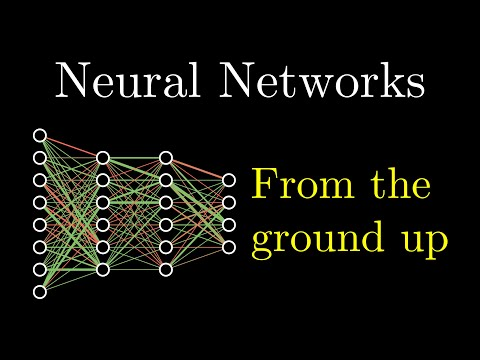

In [ ]:
from IPython.display import YouTubeVideo
import numpy as np
from matplotlib import pyplot as plt
import IPython as ipy

YouTubeVideo('aircAruvnKk', width=800, height=300)

## Why weight and bias?

play around and see the difference between the effects of W and b

In [ ]:
#play around with Y=MX+b
# why have a weight and a bias?

In [ ]:
ipy.display.HTML('<iframe src="https://www.desmos.com/calculator/os5lfdggic" width="800px" height="500px">')

In [ ]:
# we could just concat a bias vector (as 1s) to the input data, and extend the weight matrix, it's more efficient that way


### Prediction

(assuming theta and X are both vectors. $\theta$ is the W

$$
\hat{y} =\sum_{i=0}^{d} \theta_{i} x_{i}-y \\
$$

as vectors:

$$
\hat{y} = \theta^TX \\
$$


```python
def predict(W, X):
    y_pred = np.dot(W.T, X)
    return y_pred
```

### loss function:


$$J(\theta) = \frac{1}{2} \cdot  \sum(\hat{y}^{(i)} - y^{(i)})^2 $$


$$J(\theta) = \frac{1}{2} \cdot  \sum(\theta^{(i)} \cdot  X^{(i)} - y^{(i)})^2 $$

```python
def J(y_pred, Y):
    loss = 1 / 2 * (y_pred - Y)**2
    return loss
```

In [ ]:
#youd could write a loop like this..
loss = 0
for i in range(len(Y)):
    loss = 1/2 * (y_pred[i] - Y[i])**2

### gradient descent

Gradient descent needs the derivative
$$
\theta_{j}:=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

```python
def W_update(W_old, j_grad, alpha=0.1):
    W_new = W_old - alpha * j_grad
    return W_new
```

![](https://miro.medium.com/max/1024/1*G1v2WBigWmNzoMuKOYQV_g.png)

---

let's find the derivative of the loss function with respect to the weights

$$J(\theta) = \frac{1}{2} \cdot \sum(\theta^{(i)} \cdot X^{(i)} - y^{(i)})^2 $$

Derivative of the prediction:

$$\frac{\partial}{\partial \theta_{j}}\hat{y} = X_j$$

 
Official derivation
$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(\hat{y}-y\right)^{2} \\
&=2 \cdot \frac{1}{2}\left(\hat{y}-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\hat{y}-y\right) \\
&=\left(\hat{y}-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{d} \theta_{i} x_{i}-y\right) \\
&=\left(\hat{y}-y\right) x_{j}
\end{aligned}
$$

```python
def J_gradient(y_pred, Y, X):
    j_gradients = (y_pred - Y)*X # list of all gradients for each training sample
    j_gradient_sum = j_gradients.sum(axis=0).reshape(W.shape[0], -1) # summing all the gradients
    return j_gradient_sum


```

<!-- 
For one training example, the gradient update is as follows:

$$
\theta_{j}:=\theta_{j}-\alpha (\theta^{(i)} * X^{(i)}_j - y^{(i)})*(X^{(i)}_j)
$$
 -->

 The value of $\alpha$ is a hyper parameter, meaning it's not a learned parameter, you just choose is as a user

like a nob

<img src="https://www.lampandlight.eu/blog/wp-content/uploads/sites/7/2019/04/Blog700x510_dimmen-1.png" width=200px>


In [ ]:
import os
os.makedirs('plots', exist_ok=True)

def show_plot(y_pred, Y):
    plt.scatter(np.arange(len(Y)), Y, label='data')
    plt.plot(y_pred, label='prediction', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')

In [ ]:

#HW find derivative of (J with respect to b) in Y=WX+b

(150, 4)
(150, 5)
[0] loss 1.2959457372922887
0


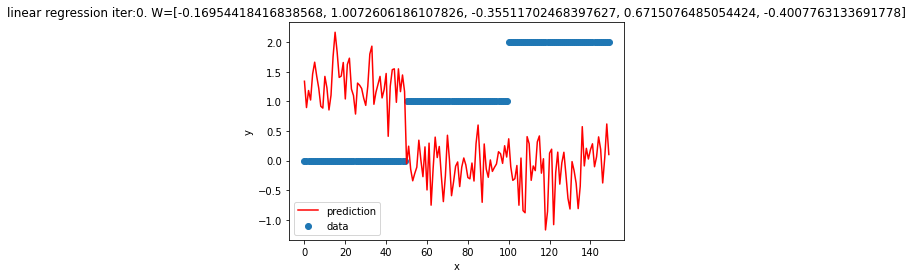

[1] loss 0.8578680510695492
[2] loss 0.8053100356930671
2
[3] loss 0.7575599671290602
[4] loss 0.7128207740876695
4
[5] loss 0.6708965304396962
[6] loss 0.631609890129064
6
[7] loss 0.594794705158903
[8] loss 0.560295294128953
8
[9] loss 0.527965782782342
[10] loss 0.49766948620338536
10
[11] loss 0.46927832993433716
[12] loss 0.44267230755894105
12
[13] loss 0.4177389724555501
[14] loss 0.3943729615672992
14
[15] loss 0.3724755491724135
[16] loss 0.3519542287647936
16
[17] loss 0.3327223212740656
[18] loss 0.314698607965842
18
[19] loss 0.29780698646745873
[20] loss 0.281976148462401
20


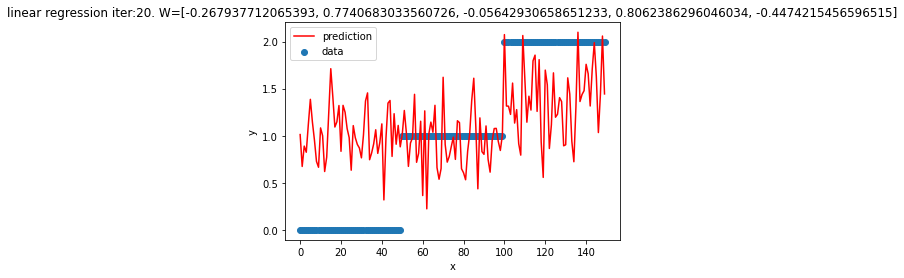

[21] loss 0.2671392776883919
[22] loss 0.2532337669601182
22
[23] loss 0.24020095301813071
[24] loss 0.22798586808096122
24
[25] loss 0.2165370070482315
[26] loss 0.2058061093688236
26
[27] loss 0.1957479546502806
[28] loss 0.18632017114381091
28
[29] loss 0.17748305629379366
[30] loss 0.16919940859178395
30
[31] loss 0.16143437002288763
[32] loss 0.15415527843723933
32
[33] loss 0.14733152922135184
[34] loss 0.1409344456834889
34
[35] loss 0.13493715760412275
[36] loss 0.12931448743711477
36
[37] loss 0.12404284367966203
[38] loss 0.11910012095941265
38
[39] loss 0.1144656064156012
[40] loss 0.11011989197771209
40


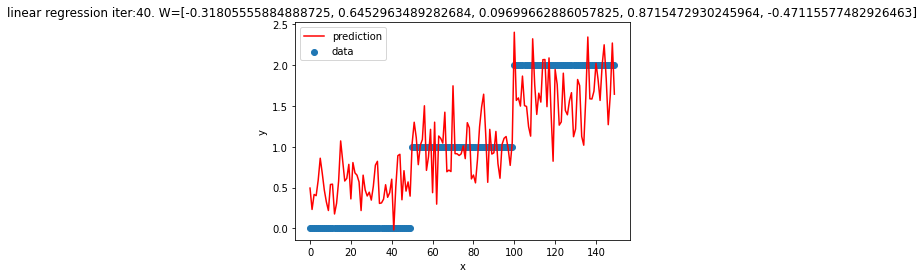

[41] loss 0.10604479217015542
[42] loss 0.10222326709484385
42
[43] loss 0.09863935026548845
[44] loss 0.09527808098797816
44
[45] loss 0.09212544100046358
[46] loss 0.08916829510480269
46
[47] loss 0.08639433553793428
[48] loss 0.08379202984758036
48
[49] loss 0.08135057205152331
[50] loss 0.07905983687360797
50
[51] loss 0.07691033686265049
[52] loss 0.07489318221264483
52
[53] loss 0.07300004311409868
[54] loss 0.07122311447704952
54
[55] loss 0.0695550828763575
[56] loss 0.06798909557928196
56
[57] loss 0.06651873152416808
[58] loss 0.0651379741273336
58
[59] loss 0.0638411858029877
[60] loss 0.06262308408826962
60


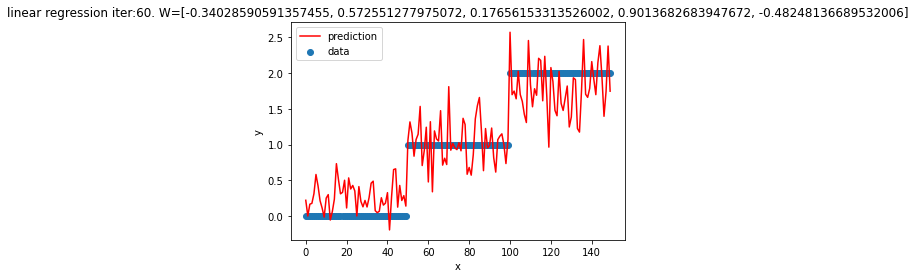

[61] loss 0.06147871927229224
[62] loss 0.06040345343444587
62
[63] loss 0.0593929408031855
[64] loss 0.058443109352118085
64
[65] loss 0.05755014355544526
[66] loss 0.05671046822972857
66
[67] loss 0.055920733393543906
[68] loss 0.05517780008090282
68
[69] loss 0.05447872704835884
[70] loss 0.05382075831950029
70
[71] loss 0.05320131151407882
[72] loss 0.052617966912345444
72
[73] loss 0.05206845720827905
[74] loss 0.051550657908311856
74
[75] loss 0.05106257833488689
[76] loss 0.050602353196747676
76
[77] loss 0.05016823469025789
[78] loss 0.04975858509829874
78
[79] loss 0.04937186985539974
[80] loss 0.049006651049731564
80


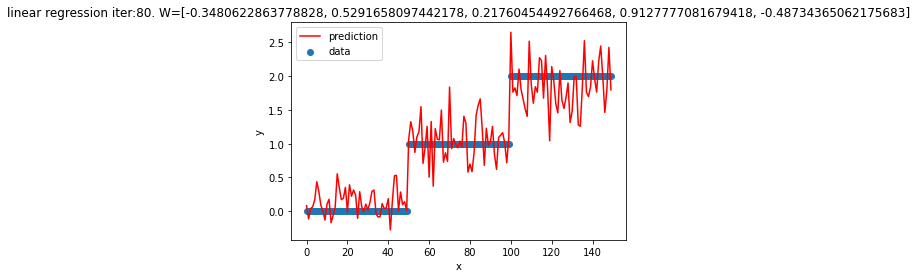

[81] loss 0.04866158133444166
[82] loss 0.048335398222545414
82
[83] loss 0.048026918741211254
[84] loss 0.04773503442279919
84
[85] loss 0.04745870661143922
[86] loss 0.047196962065272414
86
[87] loss 0.046948888835728536
[88] loss 0.04671363240638939
88
[89] loss 0.046490392075084215
[90] loss 0.046278417563895516
90
[91] loss 0.046077005842717615
[92] loss 0.04588549815291529
92
[93] loss 0.045703277218477174
[94] loss 0.04552976463285276
94
[95] loss 0.04536441841040569
[96] loss 0.04520673069211335
96
[97] loss 0.04505622559579594
[98] loss 0.044912457201770596
98
[99] loss 0.044775007665399214
[100] loss 0.0446434854485363
100


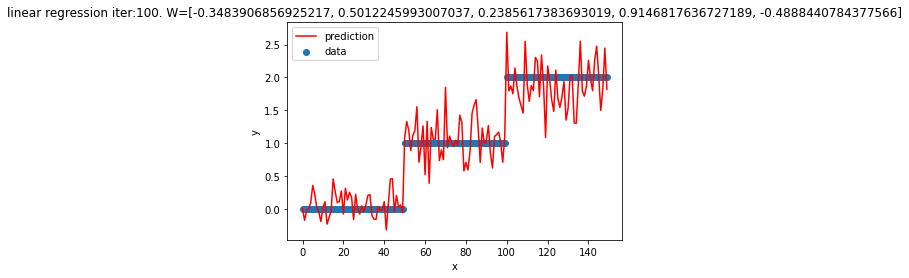

[101] loss 0.04451752366238704
[102] loss 0.04439677851475689
102
[103] loss 0.044280927855116704
[104] loss 0.04416966981132169
104
[105] loss 0.04406272151220996
[106] loss 0.04395981789067153
106
[107] loss 0.0438607105621173
[108] loss 0.04376516677359947
108
[109] loss 0.04367296841913187
[110] loss 0.04358391111704009
110
[111] loss 0.043497803345434086
[112] loss 0.043414465632141665
112
[113] loss 0.04333372979567198
[114] loss 0.043255438233994616
114
[115] loss 0.04317944325812186
[116] loss 0.04310560646767207
116
[117] loss 0.04303379816576943
[118] loss 0.042963896810801774
118
[119] loss 0.042895788502715214
[120] loss 0.04282936650166947
120


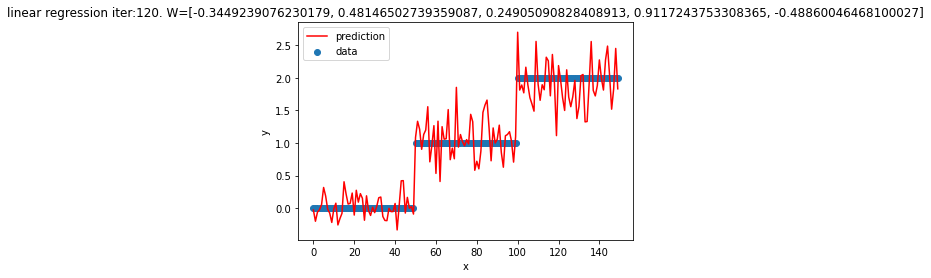

[121] loss 0.0427645307770153
[122] loss 0.04270118758468439
122
[123] loss 0.04263924907120118
[124] loss 0.042578632902640016
124
[125] loss 0.04251926191695627
[126] loss 0.04246106379821858
126
[127] loss 0.042403970771362834
[128] loss 0.04234791931617509
128
[129] loss 0.04229284989929212
[130] loss 0.042238706723084454
130
[131] loss 0.04218543749035842
[132] loss 0.04213299318388083
132
[133] loss 0.042081327859792544
[134] loss 0.042030398454035445
134
[135] loss 0.04198016460097397
[136] loss 0.041930588463442275
136
[137] loss 0.04188163457349752
[138] loss 0.041833269683204874
138
[139] loss 0.04178546262482212
[140] loss 0.04173818417979214
140


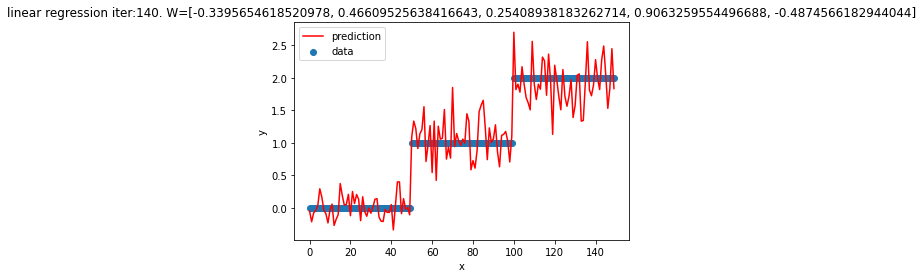

[141] loss 0.041691406955987845
[142] loss 0.04164510527269018
142
[143] loss 0.04159925505281175
[144] loss 0.04155383372190989
144
[145] loss 0.04150882011356115
[146] loss 0.041464194380696734
146
[147] loss 0.041419937912523394
[148] loss 0.04137603325667761
148
[149] loss 0.04133246404628375
[150] loss 0.041289214931607025
150
[151] loss 0.041246271516012026
[152] loss 0.04120362029595529
152
[153] loss 0.04116124860475816
[154] loss 0.04111914455992139
154
[155] loss 0.041077297013758875
[156] loss 0.041035695507140715
156
[157] loss 0.04099433022615066
[158] loss 0.04095319196147342
158
[159] loss 0.04091227207034051
[160] loss 0.040871562440873234
160


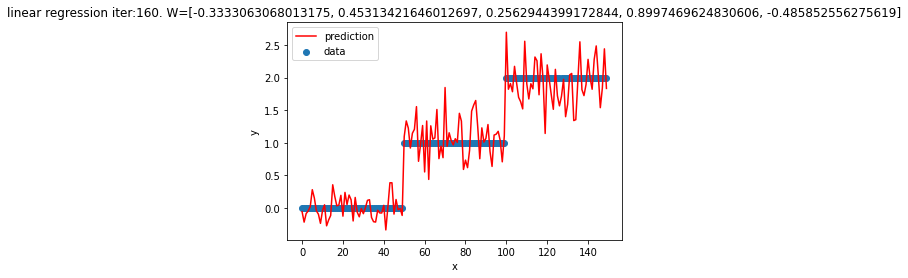

[161] loss 0.04083105545867176
[162] loss 0.04079074397550874
162
[163] loss 0.040750621279995375
[164] loss 0.040710681070094644
164
[165] loss 0.0406709174273668
[166] loss 0.04063132479283645
166
[167] loss 0.04059189794438029
[168] loss 0.040552631975539
168
[169] loss 0.04051352227566394
[170] loss 0.04047456451131432
170
[171] loss 0.04043575460882624
[172] loss 0.04039708873797968
172
[173] loss 0.04035856329669444
[174] loss 0.04032017489668986
174
[175] loss 0.04028192035004798
[176] loss 0.040243796656623136
176
[177] loss 0.04020580099224449
[178] loss 0.04016793069766159
178
[179] loss 0.040130183268186674
[180] loss 0.04009255634398863
180


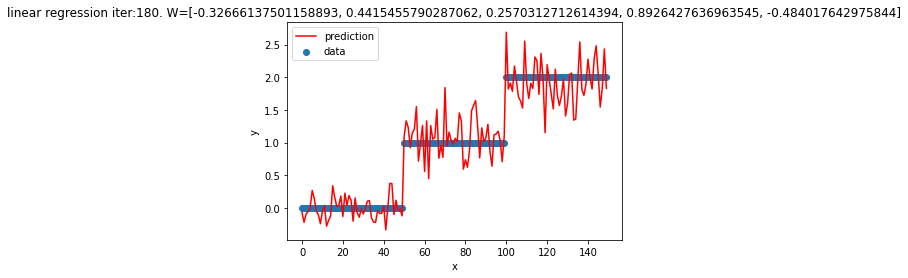

[181] loss 0.04005504770099909
[182] loss 0.04001765524239076
182
[183] loss 0.03998037699059293
[184] loss 0.039943211079809415
184
[185] loss 0.03990615574900828
[186] loss 0.03986920933535264
186
[187] loss 0.0398323702680455
[188] loss 0.03979563706256217
188
[189] loss 0.03975900831524606
[190] loss 0.03972248269824448
190
[191] loss 0.03968605895476383
[192] loss 0.03964973589462345
192
[193] loss 0.039613512390089305
[194] loss 0.0395773873719703
194
[195] loss 0.039541359825960375
[196] loss 0.039505428789210796
196
[197] loss 0.03946959334711858
[198] loss 0.03943385263031691
198
[199] loss 0.03939820581185526
y_pred (150, 1)


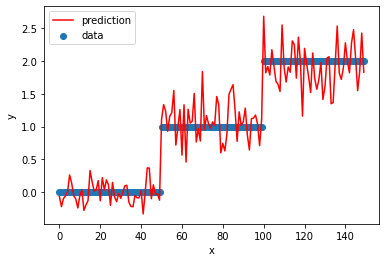

In [ ]:
def predict(W, X):
    y_pred = np.dot(X, W)
    return y_pred

def J(y_pred, Y):
    loss = 1 / 2 * (y_pred - Y)**2
    return loss

def J_gradient(y_pred, Y, X):
    j_gradients = (y_pred - Y)*X # list of all gradients for each training sample
#     return j_gradients
    j_gradient_sum = j_gradients.sum(axis=0) # taking mean of gradients
    j_gradient_sum = np.expand_dims(j_gradient_sum, -1) # reshaping so it will have same shape as W
    return j_gradient_sum

def W_update(W_old, j_grad, alpha=0.0001):
    W_new = W_old - alpha * j_grad
    return W_new



import sklearn.datasets
iris_dataset = sklearn.datasets.load_iris()
X = iris_dataset['data']
Y = np.expand_dims(iris_dataset['target'].T, 1)


# X = array([[0, 0, 1], 
#            [0.7, 1, 1],
#            [1, 0, 1], 
#            [0, 1, 1],
#            [0, 0, 1],
#            [1, 1, 1],
#            [1, 0, 1],
#            [0, 1, 1], ])
# #shape: (8, 3)
# Y = array([[0, 1, 1, 0, 0, 1, 1, 0]]).T
# shape: (8, 1)
!rm plots/*

# X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])
# Y = np.array([[1, 3, 2, 5, 7, 8, 8, 9, 10, 12]]).T

print(X.shape)
## now that we chose the data, we will initialize the weights

use_bias = True

W = 2*np.random.uniform(size=(X.shape[1] + (1 if use_bias else 0), 1)) - 1
if use_bias:
    X = np.hstack((X, np.ones((X.shape[0], 1)))) ## adding bias term
print(X.shape)

for i in range(200):
    y_pred = predict(W, X)
    loss = J(y_pred, Y)
    j_grad = J_gradient(y_pred, Y, X)
    # assert j_grad.shape == W.shape, f'shape is not the same j_grad:{j_grad.shape} =!= W:{W.shape}'
    W = W_update(W, j_grad, alpha=0.0001)



    print(f'[{i}] loss', loss.mean())
    if i % 2 == 0:
        print(i)
        plt.title(f'linear regression iter:{i}. W={list(W.reshape(-1))}')
        show_plot(y_pred, Y)
        plt.title(f'linear regression iter:{i}. W={list(W.reshape(-1))}')
        plt.savefig(f'plots/{str(i).zfill(3)}.png')
        if i % 20 == 0:
            plt.show()
        plt.close()

print('y_pred', y_pred.shape)
show_plot(y_pred, Y)
plt.show()

In [ ]:
!apt install imagemagick > /dev/null
!convert plots/*.png plots/linearregression1.gif
ipy.display.HTML('<img src="plots/linearregression1.gif">')

### Comparing with `sklearn`

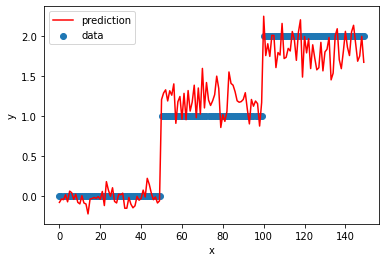

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
# reg.score(X, Y)
y_pred = reg.predict(X)

show_plot(y_pred, Y)

SUCCESS!!

We can see that our implementation and the sklearn implementation give the exact same result

(array([ 80., 111.,  83.,  86., 106., 100., 117., 102., 109., 106.]),
 array([-9.98142123e-01, -7.98651593e-01, -5.99161063e-01, -3.99670532e-01,
        -2.00180002e-01, -6.89471536e-04,  1.98801059e-01,  3.98291589e-01,
         5.97782119e-01,  7.97272650e-01,  9.96763180e-01]),
 <BarContainer object of 10 artists>)

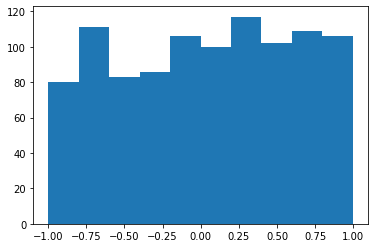

In [ ]:
X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], ])
Y = np.array([[0, 1, 1, 0, 0, 1, 1, 0]]).T

W = 2*np.random.uniform(size=(3, 1))-1
b = np.zeros((1, 3))

# initializing weights between -1 and 1
plt.hist(2*np.random.uniform(size=1000)-1)

In [ ]:

W = 2*np.random.uniform(size=(3, 1))-1
W

array([[-0.54232589],
       [-0.3393675 ],
       [-0.52775784]])